# Quantum neural network
In this example, we show the method to use built-in template in the quantum circuit.
There're three built templates in the TeD-Q module.
1. Fully-connected circuit
2. Hardware-efficient circuit
3. Randomly-generated circuit

In [1]:
import tedq as qai

# Related package
import torch
import numpy as np
import matplotlib.pyplot as plt

# Global variable
n_qubits = 5
n_layer=3

## Fully-connected circuit
For a fully-connected circuit, each qubit is connected to all of the other qubits by CNOT gate in each layer. And each layer is followed by a trainable RY and RZ gate. This layer can be used for the fully-connected layer in quantum machine learning.

In [2]:
rand_params = np.random.uniform(high=2 * np.pi, size=((n_layer+1)*3, n_qubits))
def circuitDef(theta):
    for idx, element in enumerate(theta):
        qai.RY(element, qubits=[idx])
    qai.templates.FullyConnected(n_qubits, n_layer, rand_params)
    
    exp_vals = [qai.measurement.expval(qai.PauliZ(qubits=[position])) for position in range(n_qubits)]
    return exp_vals

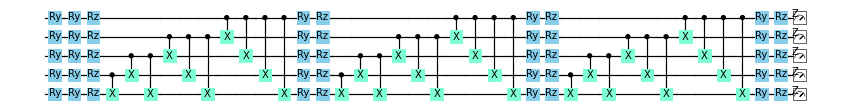

In [3]:
circuit = qai.Circuit(circuitDef, n_qubits, torch.zeros(n_qubits))
compiledCircuit = circuit.compilecircuit('pytorch')
drawer = qai.matplotlib_drawer(circuit)
drawer.draw_circuit()

## Hardware-efficient circuit
The hardware-efficient circuit is a simplified version of fully-connected layer. The qubit only connected to the neighbor qubits in each layer, so that it can be efficiently operated in real quantum device. And each layer is followed by a trainable RY and RZ gate.

In [4]:
rand_params = np.random.uniform(high=2 * np.pi, size=((n_layer+1)*3, n_qubits))
def circuitDef(theta):
    for idx, element in enumerate(theta):
        qai.RY(element, qubits=[idx])
    qai.templates.HardwareEfficient(n_qubits, n_layer, rand_params)
    
    exp_vals = [qai.measurement.expval(qai.PauliZ(qubits=[position])) for position in range(n_qubits)]

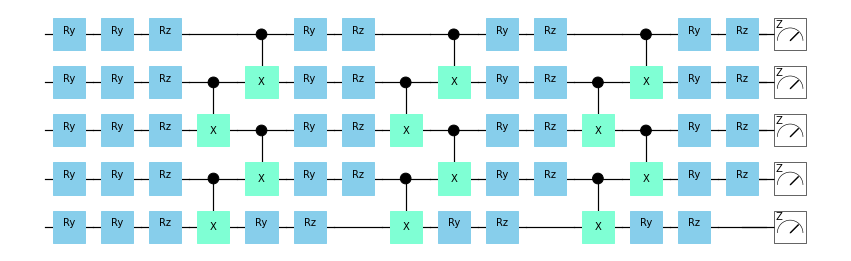

In [5]:
circuit = qai.Circuit(circuitDef, n_qubits, torch.zeros(n_qubits))
compiledCircuit = circuit.compilecircuit('pytorch')
drawer = qai.matplotlib_drawer(circuit)
drawer.draw_circuit()

## Randomly-generated circuit
For the randomly generated circuit, the gates are randomly generated and connected to a qubits. User can set the ratio argument to control the ratio between two-qubit gate and single-qubit gate. The parameters in this circuit is not trainable and the circuit is served as a non-linear transformation of the input state.

In [6]:
rand_params = np.random.uniform(high=2 * np.pi, size=((n_layer+1)*3, n_qubits))
def circuitDef():
    qai.templates.RandomLayer(n_qubits, n_layer, 0.3, rand_params)
    exp_vals = [qai.measurement.expval(qai.PauliZ(qubits=[position])) for position in range(n_qubits)]

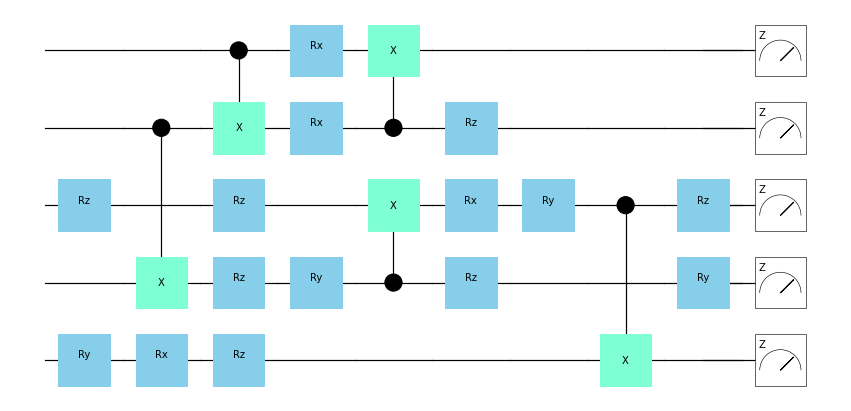

In [7]:
circuit = qai.Circuit(circuitDef, n_qubits)
compiledCircuit = circuit.compilecircuit('pytorch')
drawer = qai.matplotlib_drawer(circuit)
drawer.draw_circuit()